In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pyclustering
import pandas as pd
import random

In [2]:
folder_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50"
test_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50\\image"
ground_truth_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50\\ground-truth"

In [3]:
def load_images_from_folder(folder):
    images = []
    ls = os.listdir(folder)
    ls.sort()
    ID = []
    #print(ls)
    for filename in ls:
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            ID.append(filename)
    return images, ID

In [4]:
# Binary Conversion so to get precison/recall # 256/2 = 128 # 0 For <=127 , 1 else 
# 0-> Black 255-> White
def convert_gray_2_binary_data(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j] <= 127):
                img[i,j] = 0
            else:
                img[i,j] = 1
    plt.imshow(img, cmap = 'gray')
    return img
def convert_gray_2_binary_truth(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j] <= 127):
                img[i,j] = 0
            else:
                img[i,j] = 1
    plt.imshow(img, cmap = 'gray')
    return img

In [5]:
images, ID_data = load_images_from_folder(test_path)
images_ground_truth, ID_truth = load_images_from_folder(ground_truth_path)

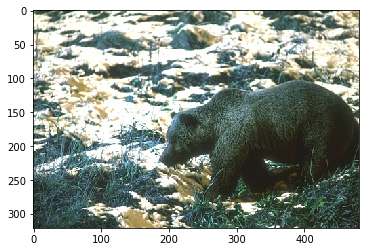

In [6]:
plt.imshow( images[0])

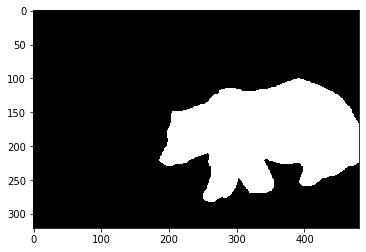

In [7]:
plt.imshow(images_ground_truth[0])

# KMEANS

Processing: 100098.jpg Number: 0
Processing: 101027.jpg Number: 1
Processing: 103006.jpg Number: 2
Processing: 103029.jpg Number: 3
Processing: 104010.jpg Number: 4
Processing: 105027.jpg Number: 5
Processing: 106005.jpg Number: 6
Processing: 106024.jpg Number: 7
Processing: 106025.jpg Number: 8
Processing: 106047.jpg Number: 9
Processing: 107072.jpg Number: 10
Processing: 12003.jpg Number: 11
Processing: 15062.jpg Number: 12
Processing: 23084.jpg Number: 13
Processing: 26031.jpg Number: 14
Processing: 29030.jpg Number: 15
Processing: 3063.jpg Number: 16
Processing: 3096.jpg Number: 17
Processing: 35010.jpg Number: 18
Processing: 35058.jpg Number: 19
Processing: 35070.jpg Number: 20
Processing: 41006.jpg Number: 21
Processing: 41025.jpg Number: 22
Processing: 41029.jpg Number: 23
Processing: 41033.jpg Number: 24
Processing: 41069.jpg Number: 25
Processing: 41085.jpg Number: 26
Processing: 41096.jpg Number: 27
Processing: 42044.jpg Number: 28
Processing: 42049.jpg Number: 29
Processing:

50

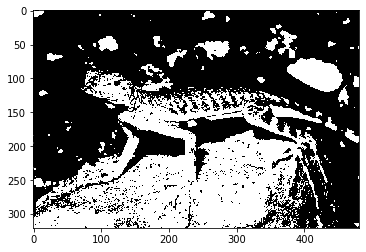

In [12]:
results = []
k = 0
for img in images: 
    print('Processing:', ID_data[k], 'Number:', k)
    k =  k + 1
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # plt.figure()
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    # print(vectorized.shape)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    attempts = 100
    ret,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    result_image = cv2.cvtColor(result_image,cv2.COLOR_RGB2GRAY)
    # plt.figure()
    # plt.imshow(result_image, cmap = 'gray')
    result_image = convert_gray_2_binary_data(result_image)
    results.append(result_image) 
len(results)    

50

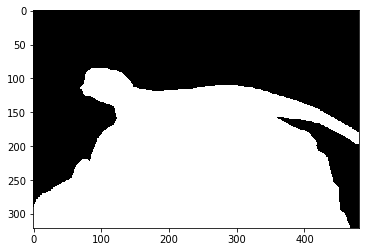

In [9]:
ground_truths = []
for img in images_ground_truth: 
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = convert_gray_2_binary_truth(img)
    ground_truths.append(img) 
len(ground_truths)

In [17]:
# Precision, Recall, F1 Score, IUC
# TP = 11 (ground_truth, result_data)
# TN = 00 (actual, predicted)
# FP = 01
# FN = 10
def calc_precision_recall(results, ground_truths):
    precisions = []
    recalls = []
    F1_scores = []
    IOUs = []
    accuracies =[]
     
    for k in range(len(results)):
        print('for image',k, '\n')
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for i in range(results[k].shape[0]):
            for j in range(results[k].shape[1]):
                if results[k][i,j] == 0 and ground_truths[k][i,j] == 0:
                    TN = TN + 1
                elif results[k][i,j] == 0 and ground_truths[k][i,j] == 1:
                    FP = FP + 1
                elif results[k][i,j] == 1 and ground_truths[k][i,j] == 0:
                    FN = FN + 1
                else :
                    TP = TP + 1
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        iou = TP /(TP + FN + FP )
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        if (precision + recall) != 0:
            f1_score = (2 * precision * recall)/ (precision + recall)
        else:
            f1_score = 0
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy*100)
        IOUs.append(iou)
        F1_scores.append(f1_score)
    return precisions, recalls, accuracies, IOUs, F1_scores

In [18]:
precisions, recalls, accuracies, IOUs, F1_scores = calc_precision_recall(results, ground_truths)

for image 0 

for image 1 

for image 2 

for image 3 

for image 4 

for image 5 

for image 6 

for image 7 

for image 8 

for image 9 

for image 10 

for image 11 

for image 12 

for image 13 

for image 14 

for image 15 

for image 16 

for image 17 

for image 18 

for image 19 

for image 20 

for image 21 

for image 22 

for image 23 

for image 24 

for image 25 

for image 26 

for image 27 

for image 28 

for image 29 

for image 30 

for image 31 

for image 32 

for image 33 

for image 34 

for image 35 

for image 36 

for image 37 

for image 38 

for image 39 

for image 40 

for image 41 

for image 42 

for image 43 

for image 44 

for image 45 

for image 46 

for image 47 

for image 48 

for image 49 



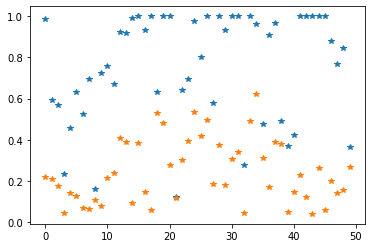

In [19]:
plt.plot(precisions, '*')
plt.plot(recalls, '*')

In [20]:
df = pd.DataFrame(ID_data, columns = ['Image_ID'])
df.insert(1, "Precision", precisions, True) 
df.insert(2, "Recall", recalls, True)
df.insert(3, "F1_score", F1_scores, True) 
df.insert(4, "Accuracy", accuracies, True)
df.insert(5, "IOU", IOUs, True) 
df.head()

,Image_ID,Precision,Recall,F1_score,Accuracy,IOU
0,100098.jpg,0.984896,0.220352,0.360131,21.960998,0.219610
1,101027.jpg,0.595743,0.208108,0.308463,18.235633,0.182356
2,103006.jpg,0.571466,0.176189,0.269338,15.562723,0.155627
3,103029.jpg,0.236296,0.043318,0.073215,3.799846,0.037998
4,104010.jpg,0.459114,0.144169,0.219433,12.323754,0.123238


In [21]:
df.to_csv('Kmeans.csv', index=False)

In [14]:
def convert(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                img[i,j] = 1
            else:
                img[i,j] = 0
    return img            

In [15]:
ls = [0, 2, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49]
for i in ls:
    results[i] = convert(results[i])

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


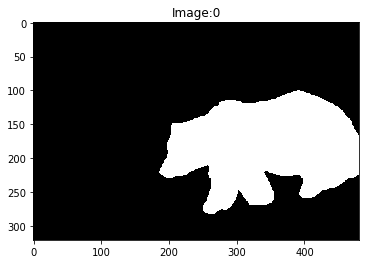

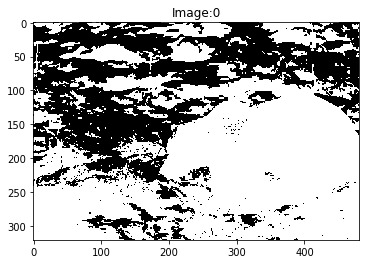

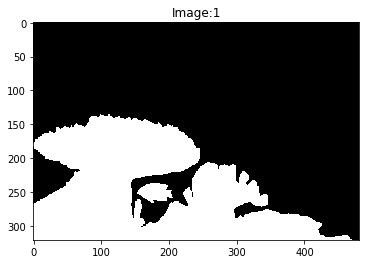

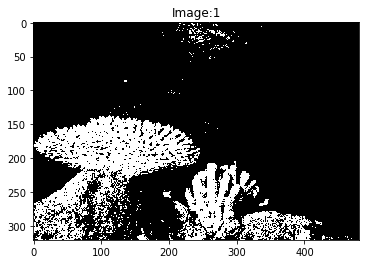

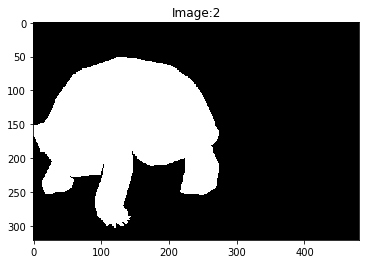

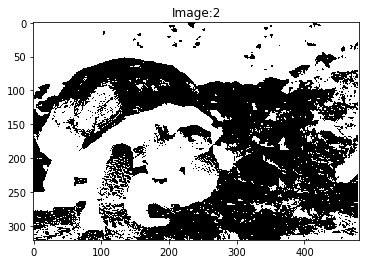

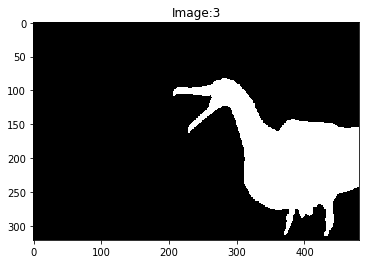

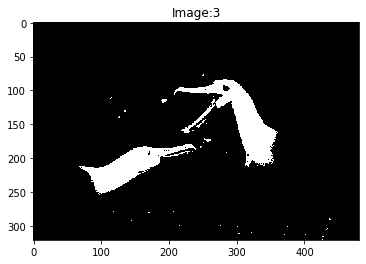

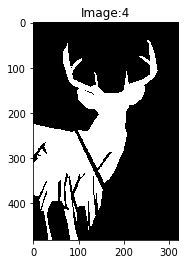

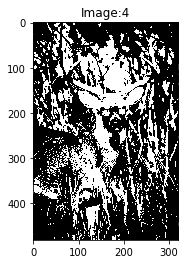

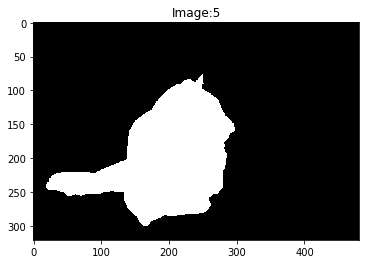

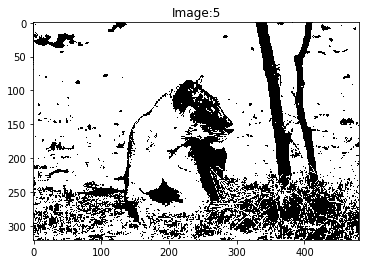

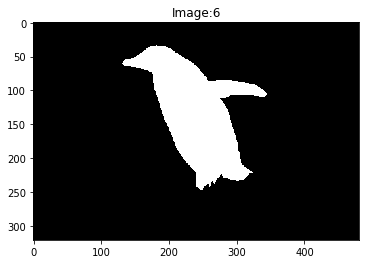

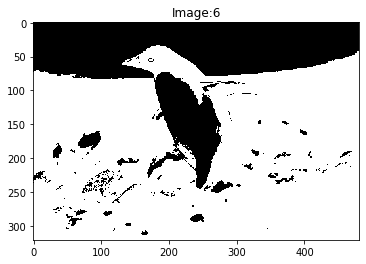

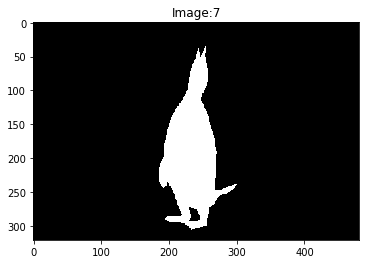

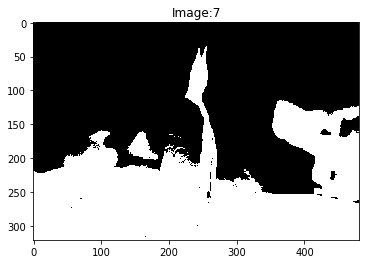

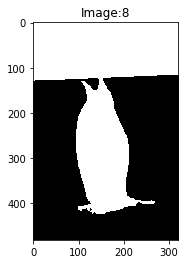

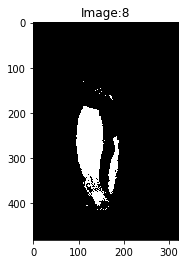

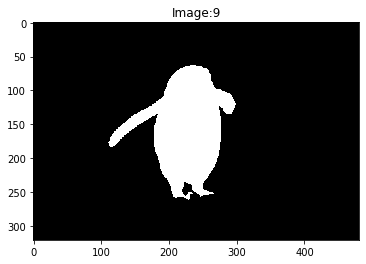

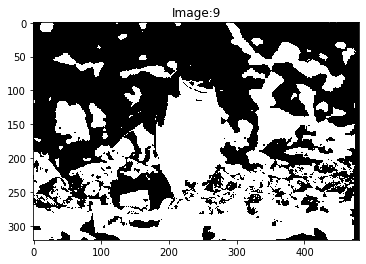

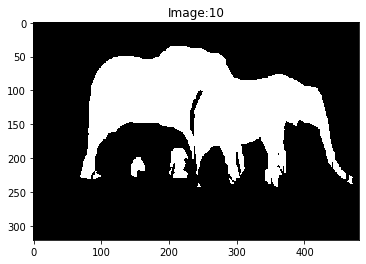

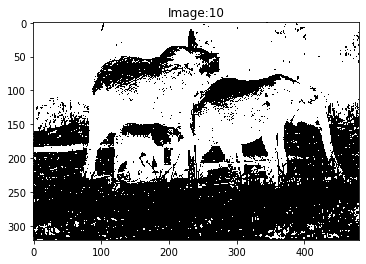

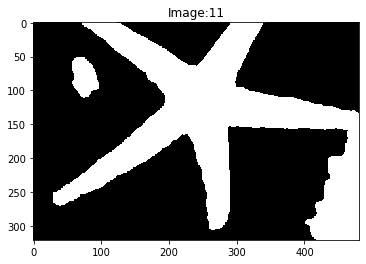

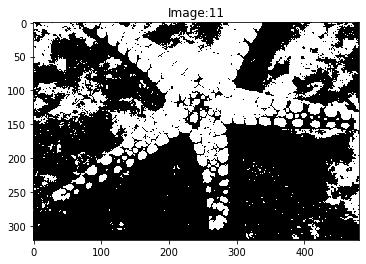

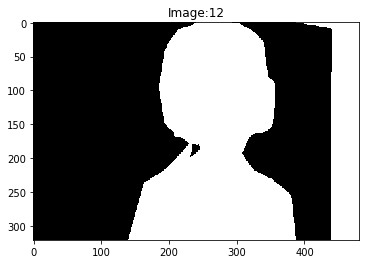

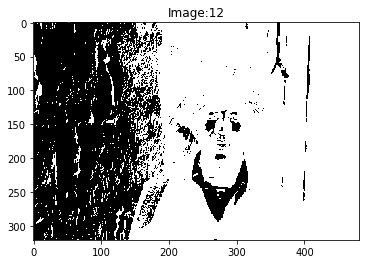

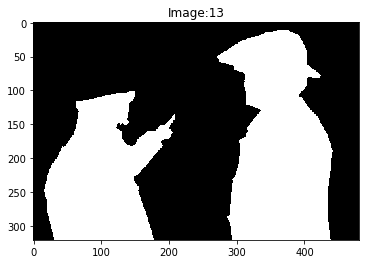

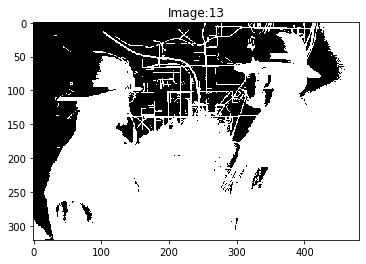

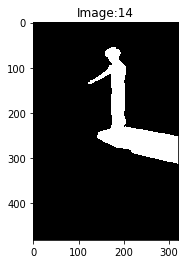

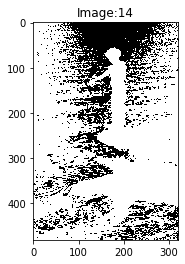

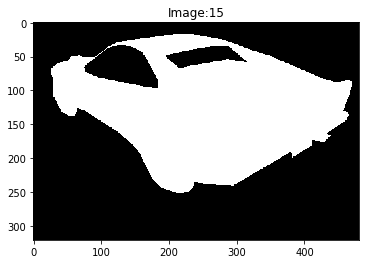

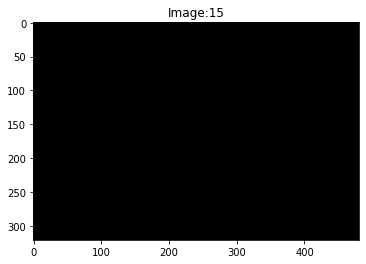

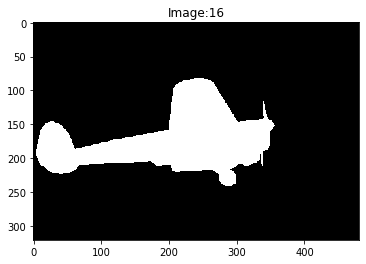

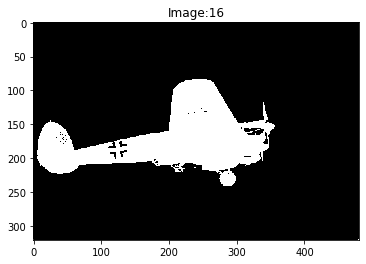

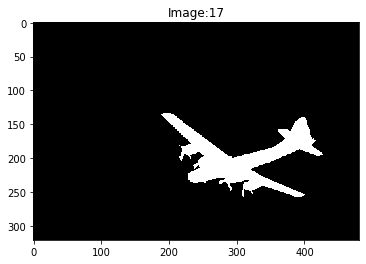

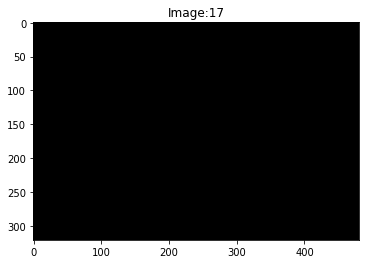

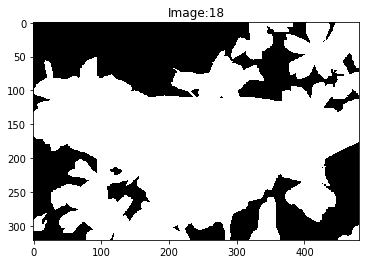

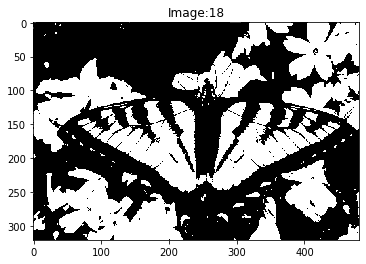

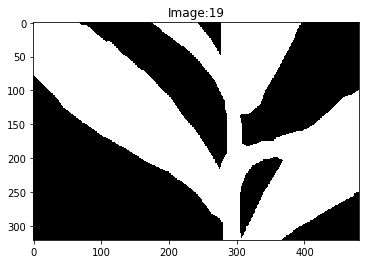

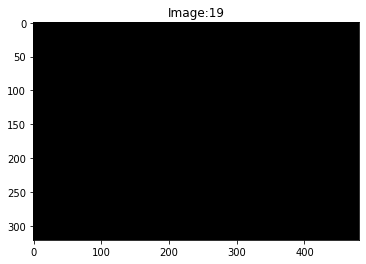

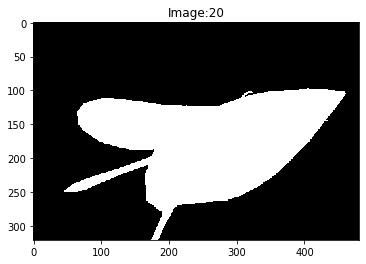

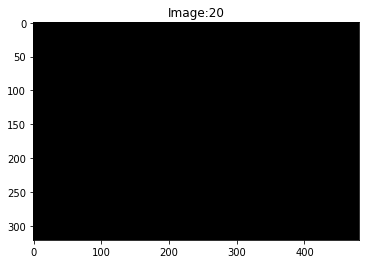

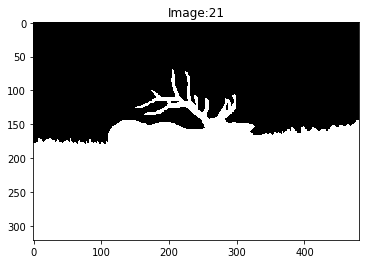

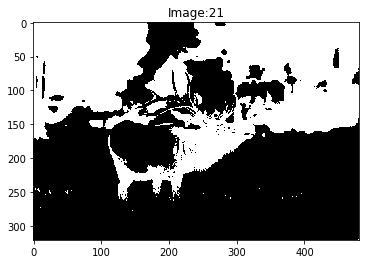

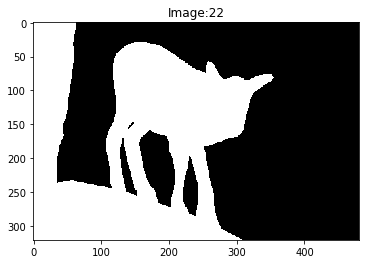

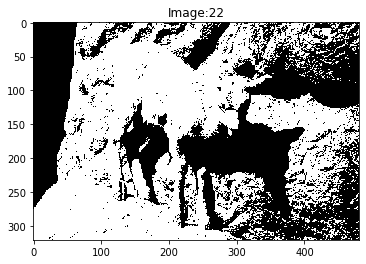

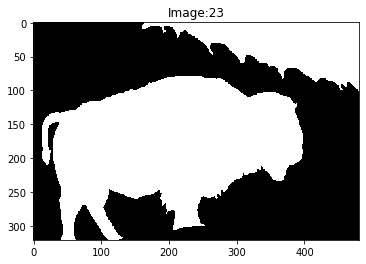

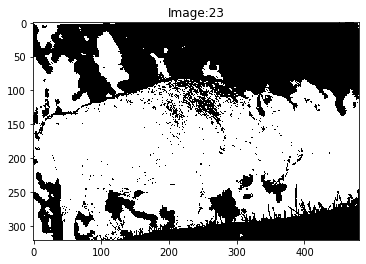

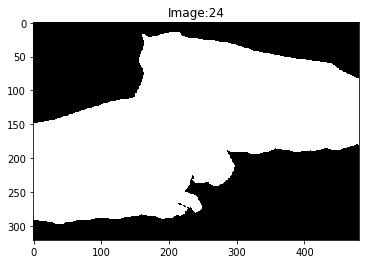

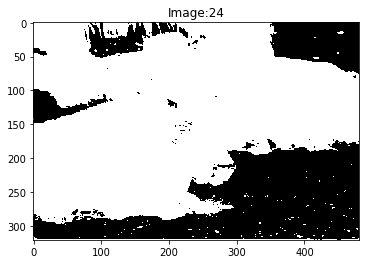

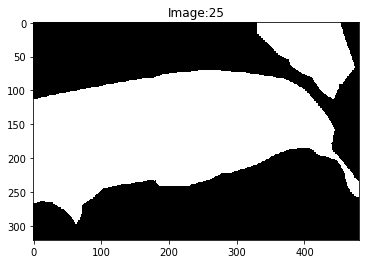

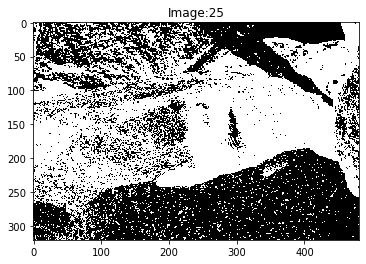

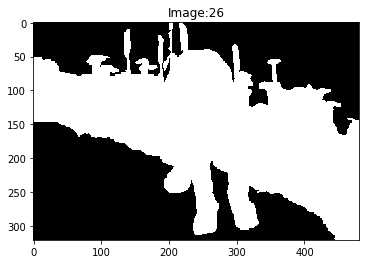

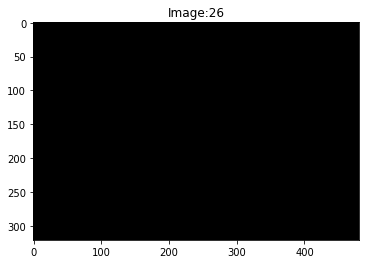

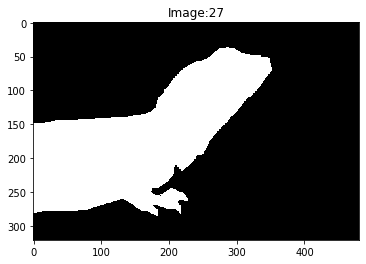

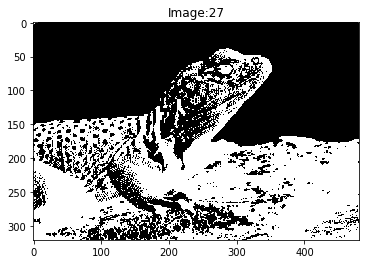

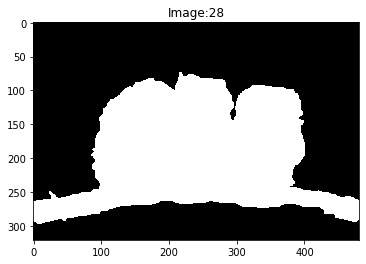

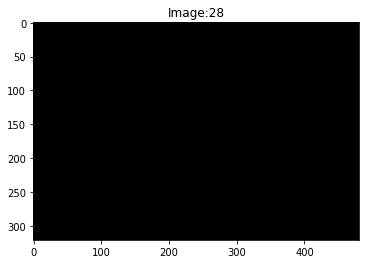

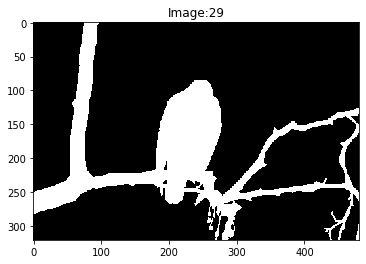

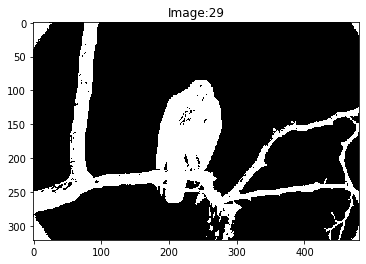

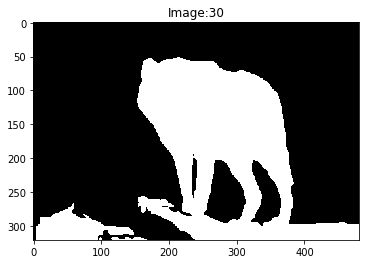

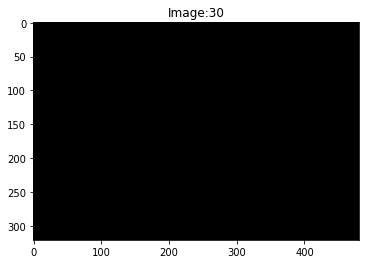

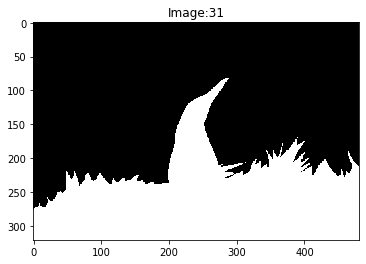

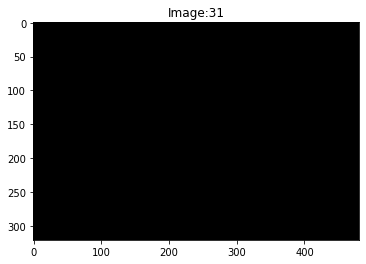

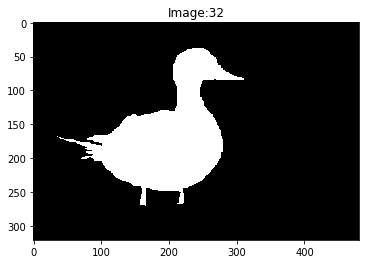

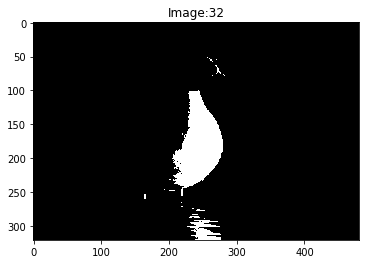

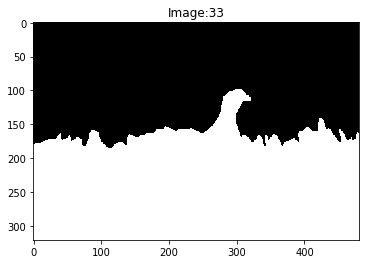

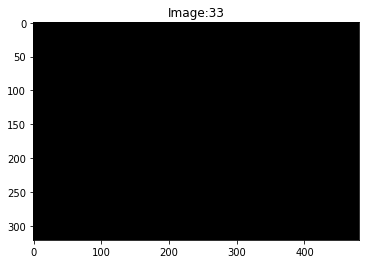

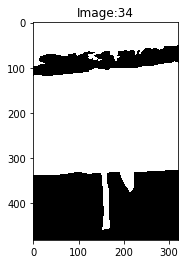

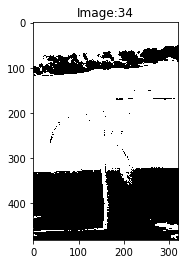

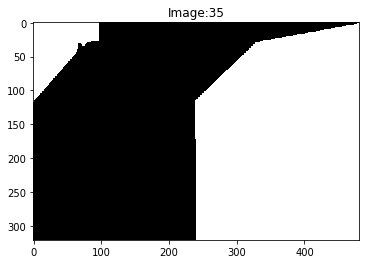

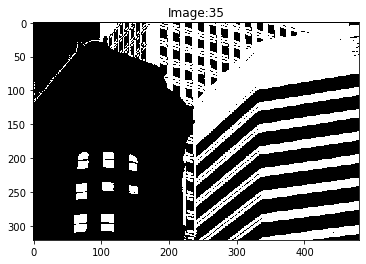

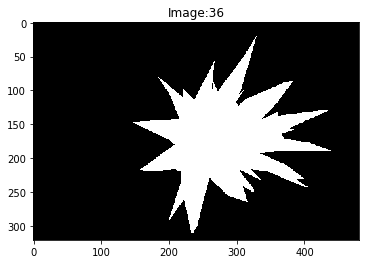

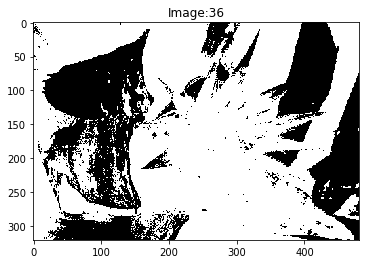

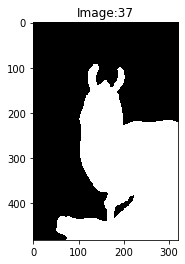

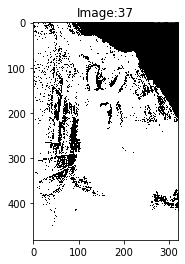

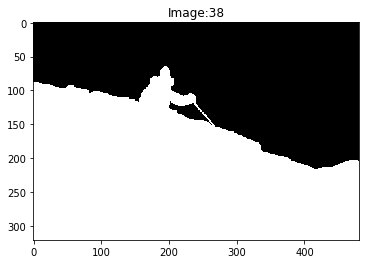

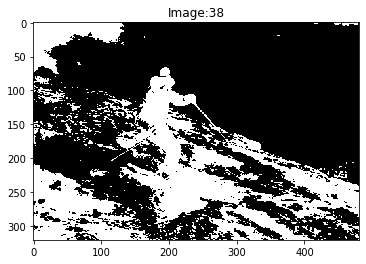

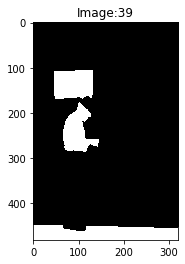

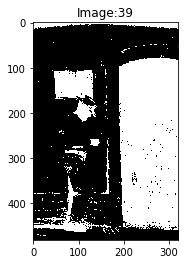

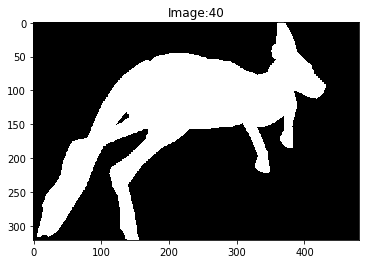

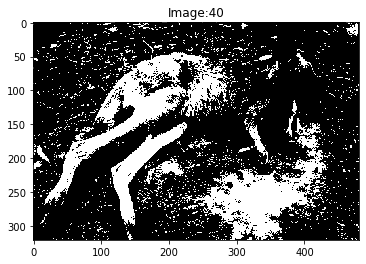

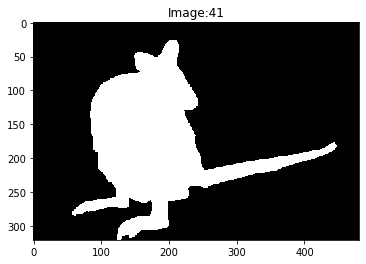

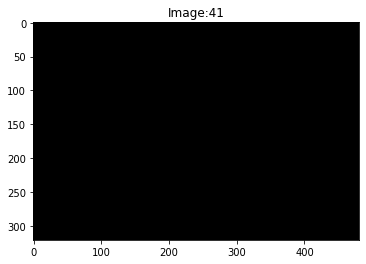

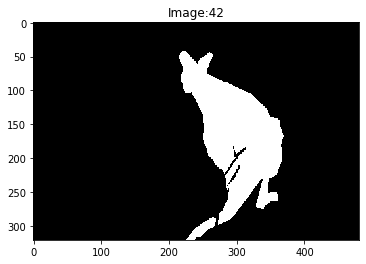

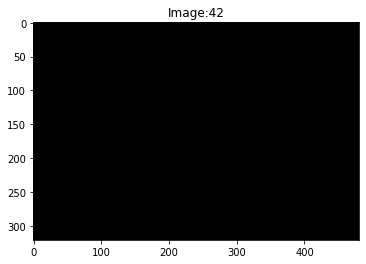

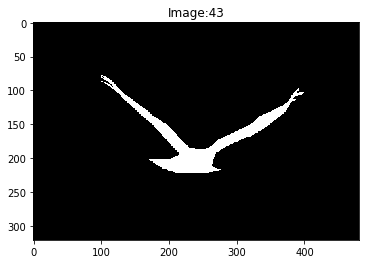

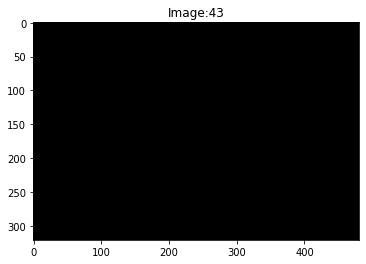

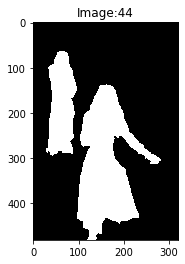

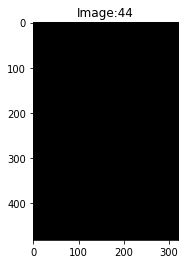

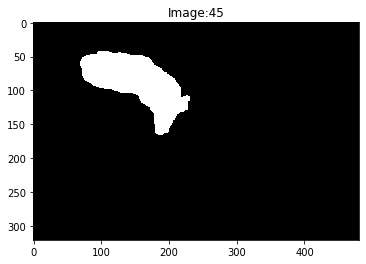

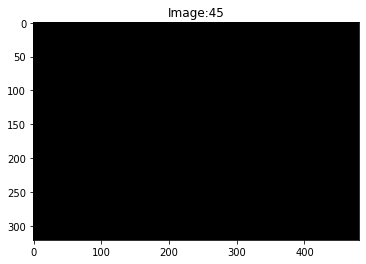

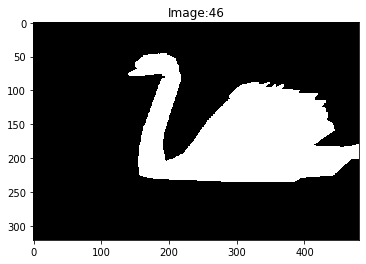

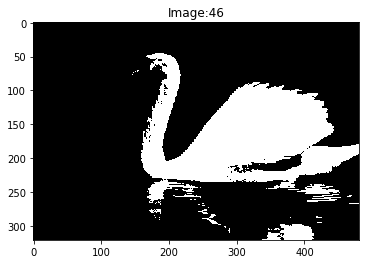

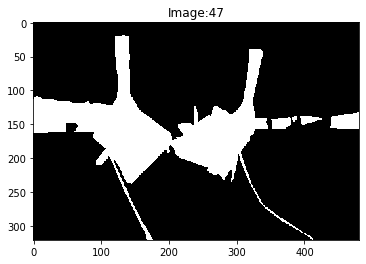

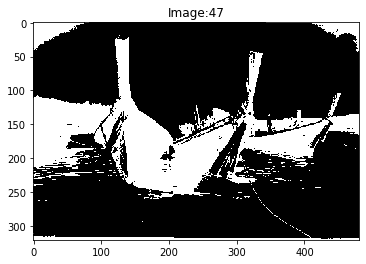

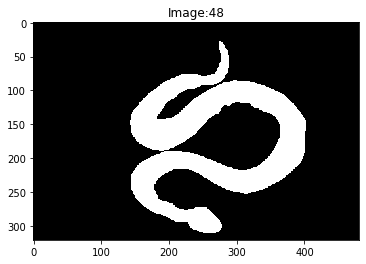

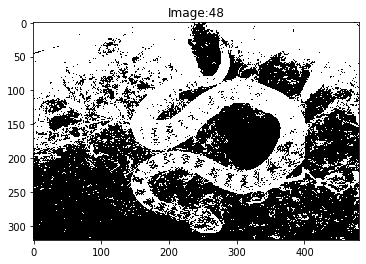

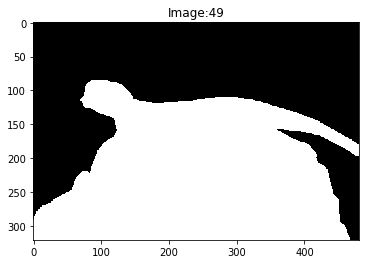

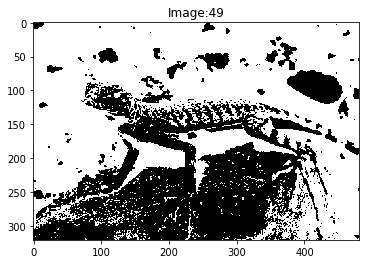

In [16]:
for i in range(50):
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(ground_truths[i], cmap = 'gray')
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(results[i], cmap = 'gray')
    

# KMedoids

Working on image : 0
(154401,)


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[131, 14]
Working on image : 1
(154401,)
[89, 1]
Working on image : 2
(154401,)
[125, 26]
Working on image : 3
(154401,)
[77, 23]
Working on image : 4
(154401,)
[106, 22]
Working on image : 5
(154401,)
[129, 31]
Working on image : 6
(154401,)
[123, 27]
Working on image : 7
(154401,)
[174, 34]
Working on image : 8
(154401,)
[70, 22]
Working on image : 9
(154401,)
[107, 20]
Working on image : 10
(154401,)
[134, 22]
Working on image : 11
(154401,)
[98, 10]
Working on image : 12
(154401,)
[113, 5]
Working on image : 13
(154401,)
[94, 0]
Working on image : 14
(154401,)
[100, 1]
Working on image : 15
(154401,)
[62, 2]
Working on image : 16
(154401,)
[153, 2]
Working on image : 17
(154401,)
[121, 1]
Working on image : 18
(154401,)
[120, 17]
Working on image : 19
(154401,)
[63, 13]
Working on image : 20
(154401,)
[99, 19]
Working on image : 21
(154401,)


C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[114, 8]
Working on image : 22
(154401,)
[87, 1]
Working on image : 23
(154401,)
[120, 13]
Working on image : 24
(154401,)
[90, 4]
Working on image : 25
(154401,)
[128, 10]
Working on image : 26
(154401,)
[75, 1]
Working on image : 27
(154401,)
[95, 5]
Working on image : 28
(154401,)
[37, 6]
Working on image : 29
(154401,)
[169, 8]
Working on image : 30
(154401,)
[32, 3]
Working on image : 31
(154401,)
[60, 8]
Working on image : 32
(154401,)
[52, 2]
Working on image : 33
(154401,)
[60, 4]
Working on image : 34
(154401,)
[125, 3]
Working on image : 35
(154401,)
[72, 0]
Working on image : 36
(154401,)
[85, 0]
Working on image : 37
(154401,)
[112, 1]
Working on image : 38
(154401,)
[185, 11]
Working on image : 39
(154401,)
[125, 29]
Working on image : 40
(154401,)
[96, 0]
Working on image : 41
(154401,)
[70, 0]
Working on image : 42
(154401,)
[75, 0]
Working on image : 43
(154401,)
[87, 5]
Working on image : 44
(154401,)
[67, 0]
Working on image : 45
(154401,)
[86, 0]
Working on image : 4

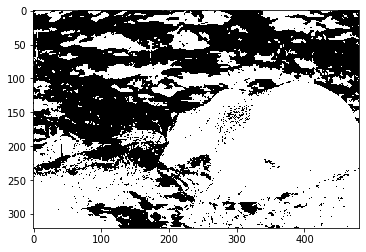

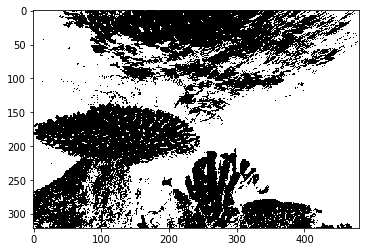

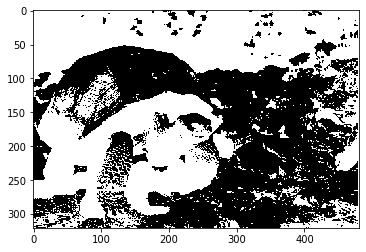

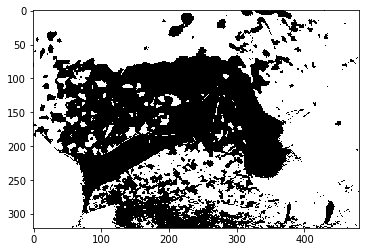

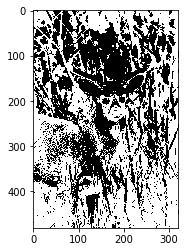

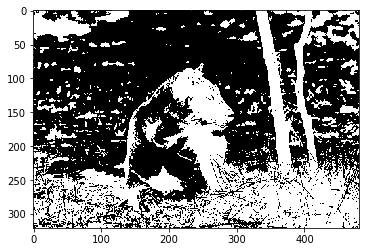

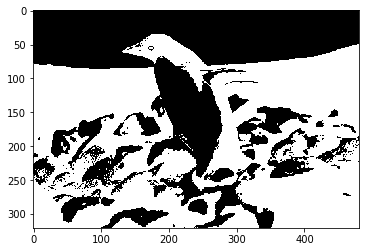

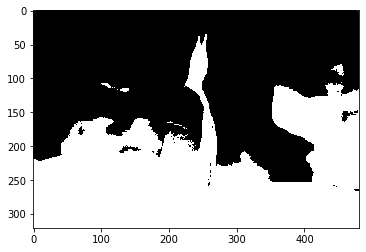

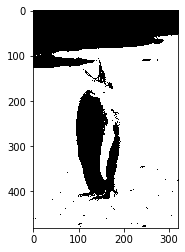

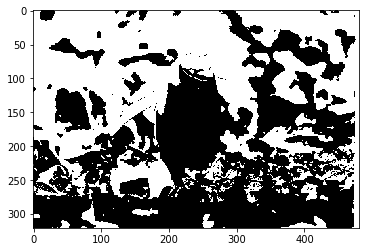

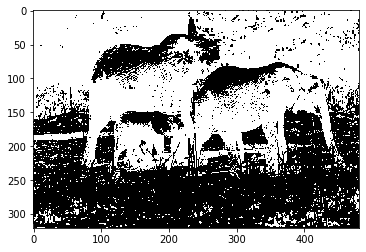

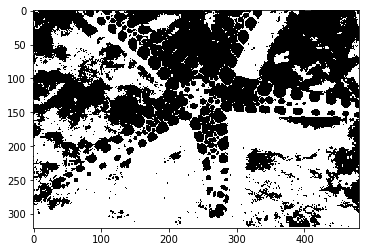

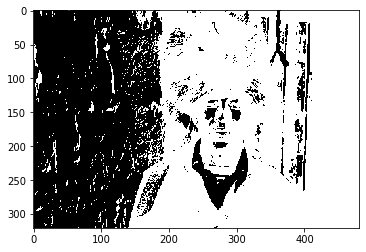

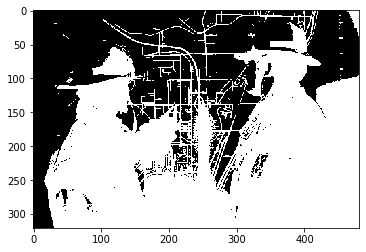

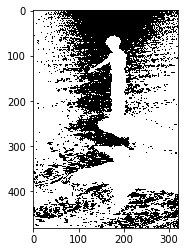

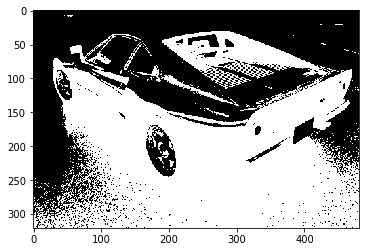

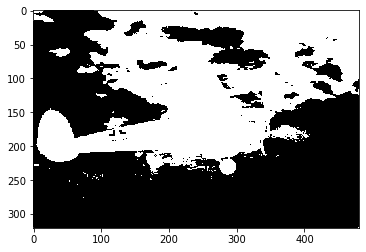

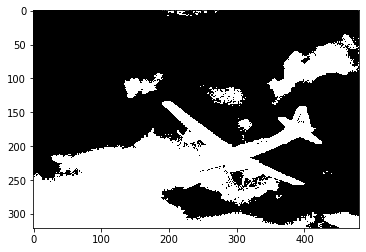

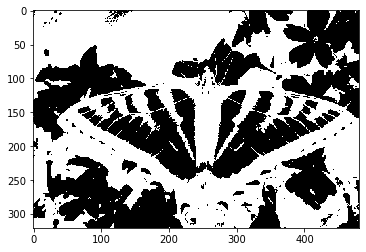

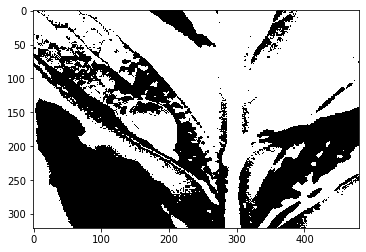

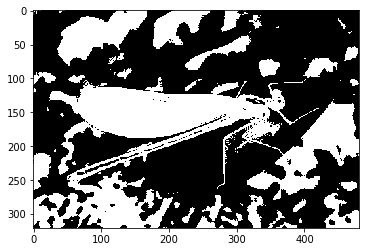

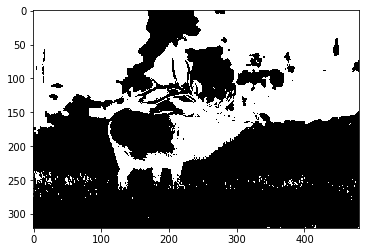

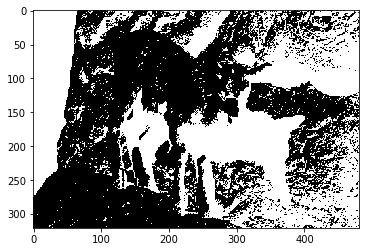

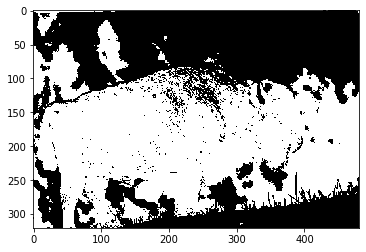

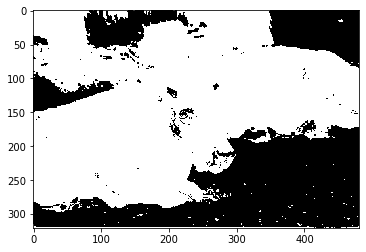

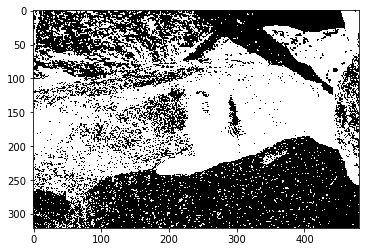

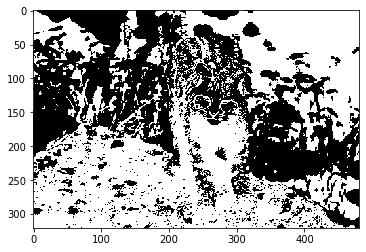

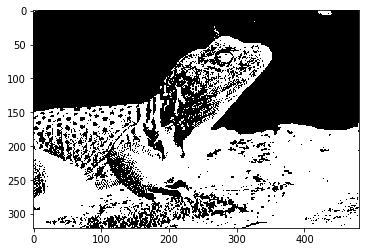

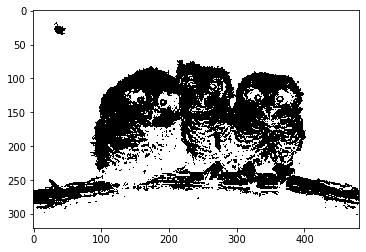

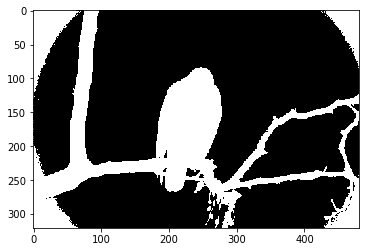

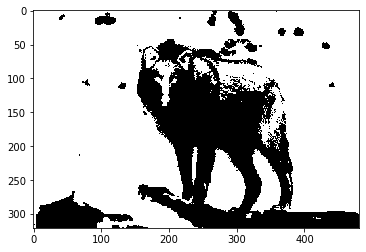

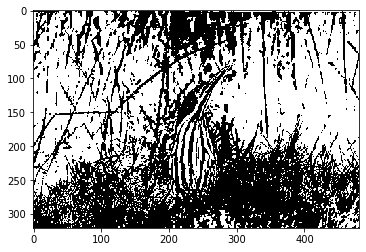

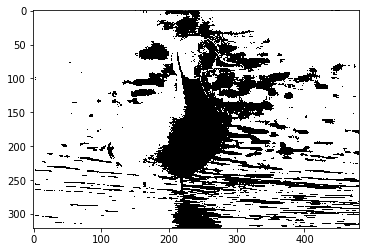

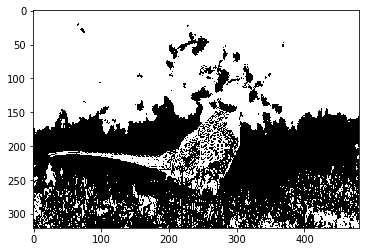

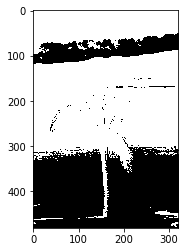

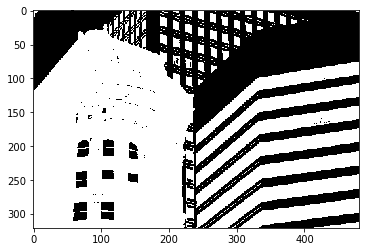

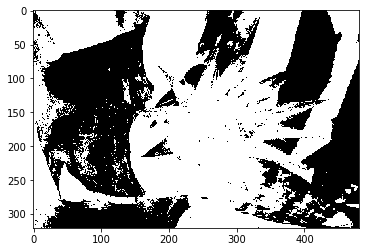

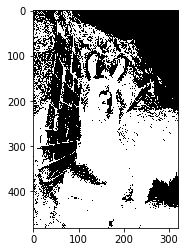

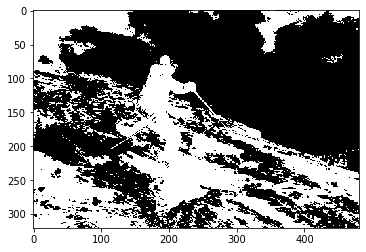

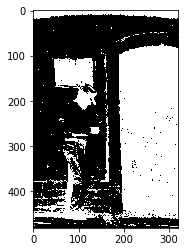

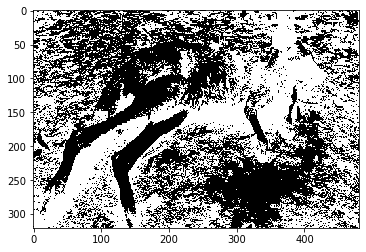

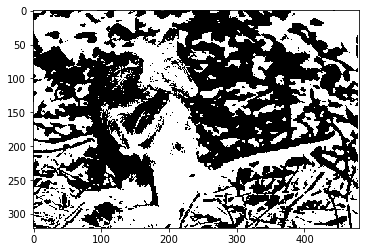

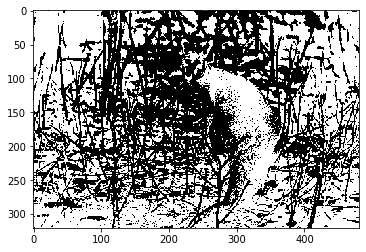

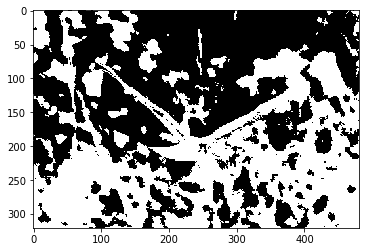

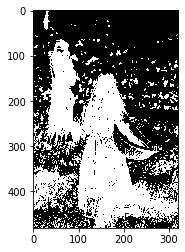

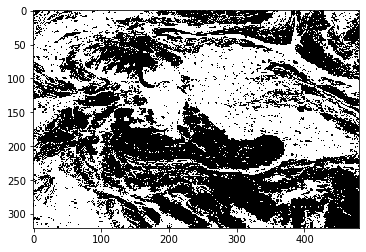

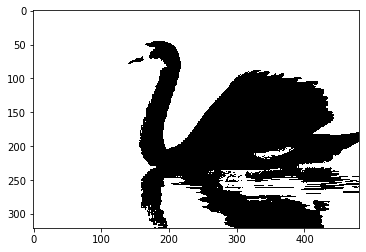

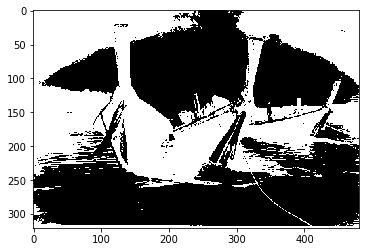

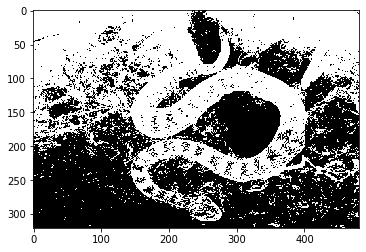

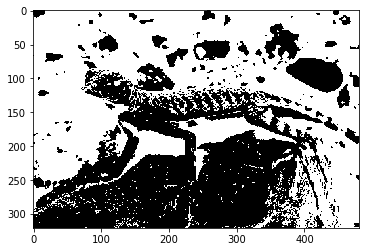

In [22]:
# Kmedoid algo
def distance(a,b):
    return np.abs(a-b)
def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

def mean_calc(img, labels, medoids):
    mean_1 = 0
    mean_2 = 0
    for i in range(len(img)):
        if labels[i] == medoids[0]:
            mean_1 = mean_1 + img[i]
        else:
            mean_1 = mean_1 + img[i]
    mean_1 = mean_1/len(img)
    mean_2 = mean_2/len(img)
    
    ## nearest mean
    mean_1 = closest(img, mean_1)
    mean_2 = closest(img, mean_2)
    
    return mean_1, mean_2
   
    
results = []
for p in range(50):                  
    print('Working on image :', p)
    img = images[p]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = img.reshape((-1,))
    print(img.shape)
    K = 2
    medoid = []
    m1 = random.choice(img)
    m2 = random.choice(img)
    medoids =   [m1,  m2]
    #plt.imshow(img, cmap = 'gray')
    iters = 10
    for i in range(iters):
        labels = np.zeros(len(img))
        # Label assignment    
        for j in range(len(img)):
                if distance(img[j], medoids[0]) < distance(img[j], medoids[1]):
                    labels[j] = medoids[0]
                else:
                    labels[j] = medoids[1]
         # Mean calculation

        mean_1, mean_2 = mean_calc(img, labels, medoids)
        medoids[0] = mean_1 
        medoids[1] = mean_2

    print(medoids)    
    for i in range(len(img)):
        if labels[i] == medoids[0]:
            img[i] = 0
        else:
            img[i] = 1
    img = img.reshape(images[p].shape[:2]) 
    plt.figure()
    plt.imshow(img, cmap = 'gray')
    results.append(img)                   
    
    

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


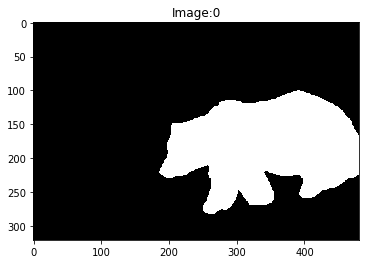

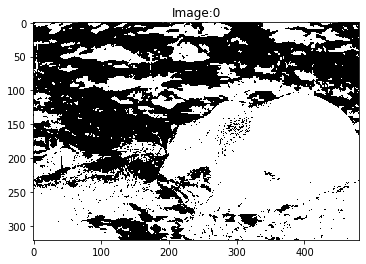

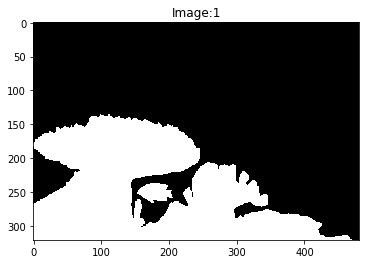

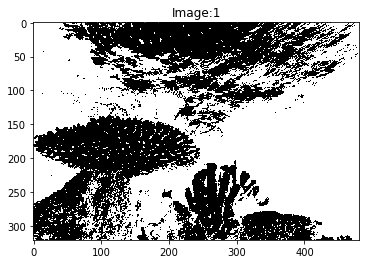

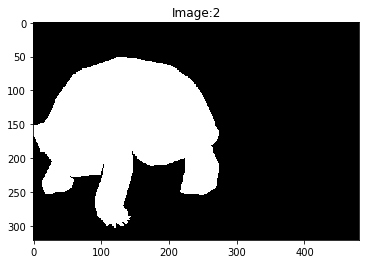

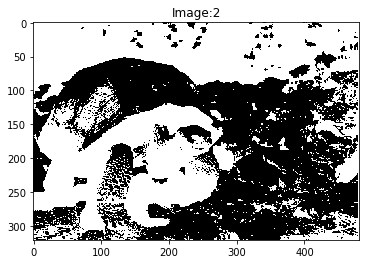

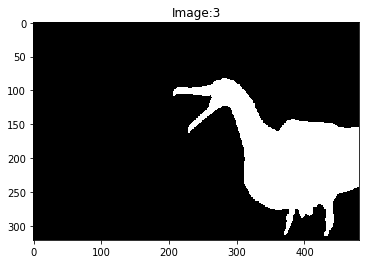

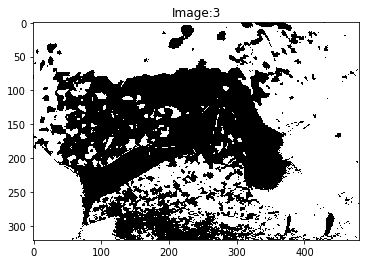

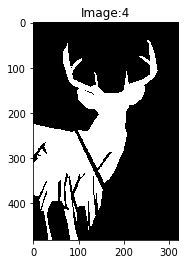

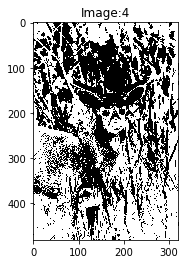

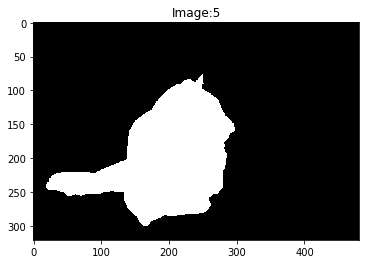

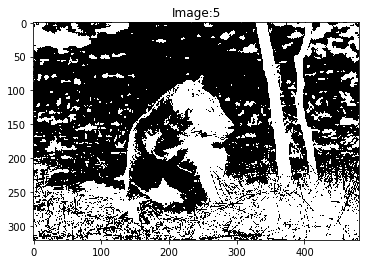

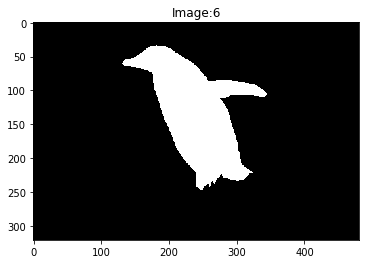

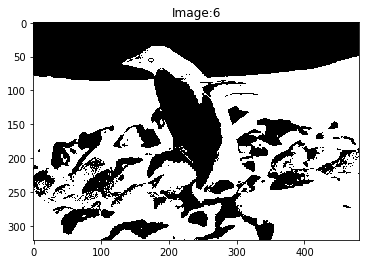

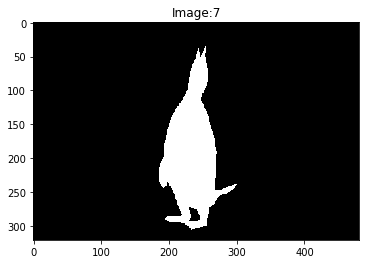

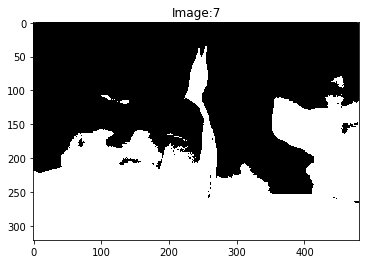

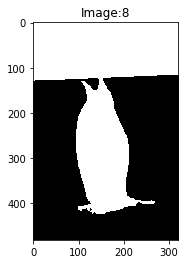

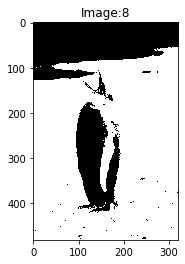

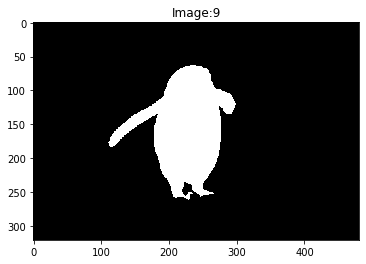

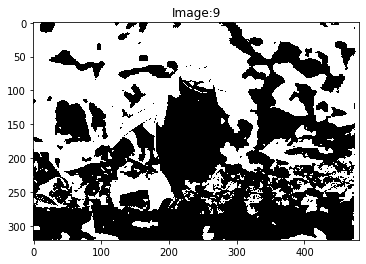

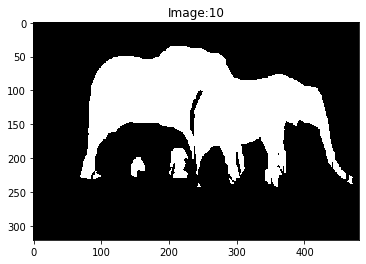

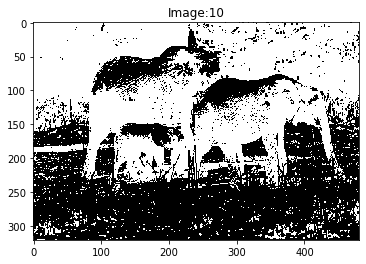

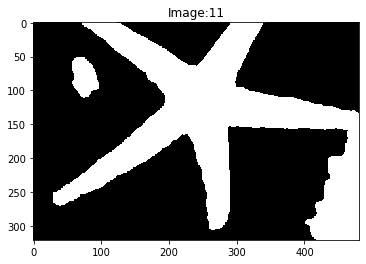

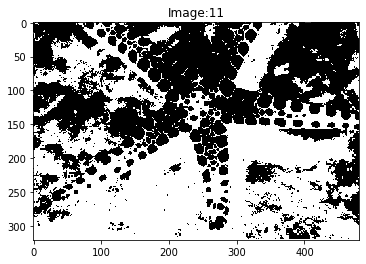

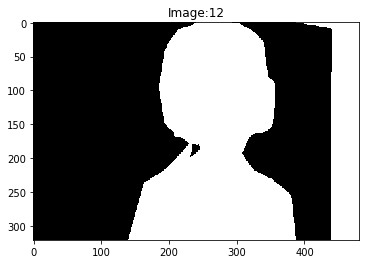

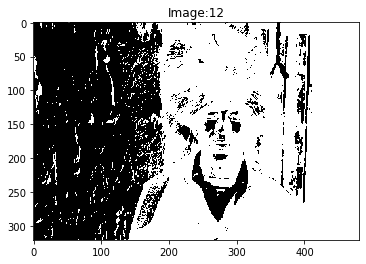

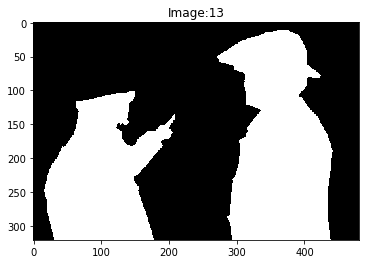

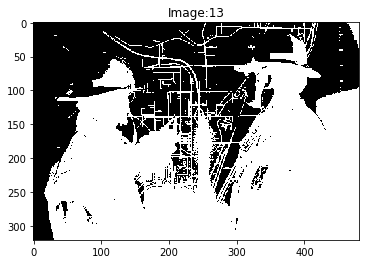

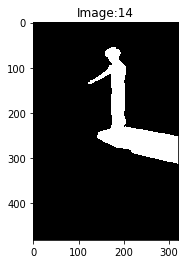

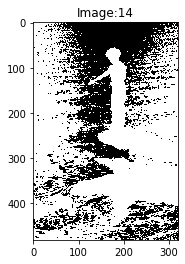

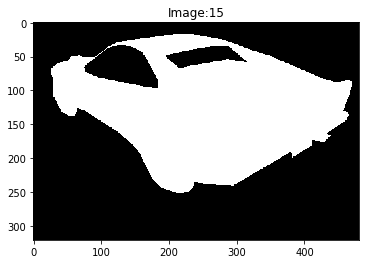

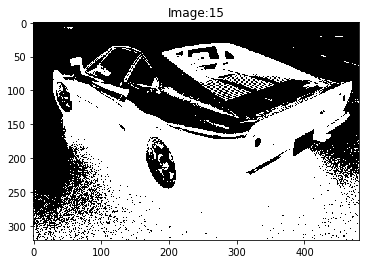

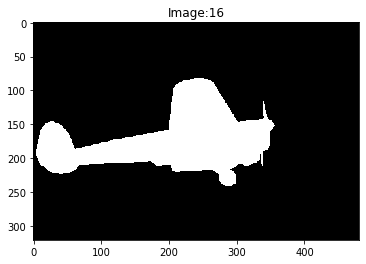

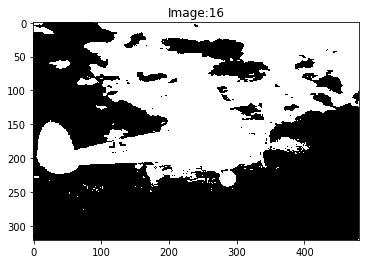

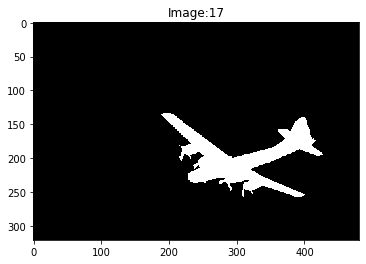

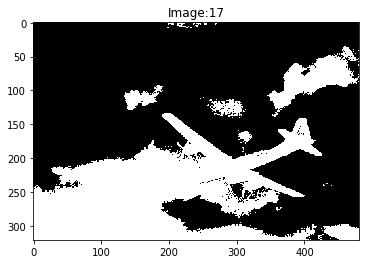

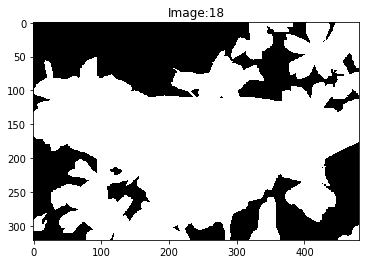

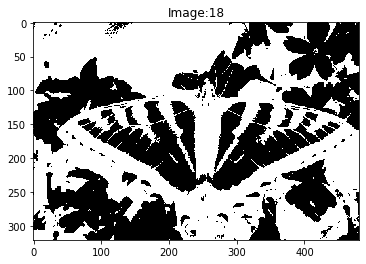

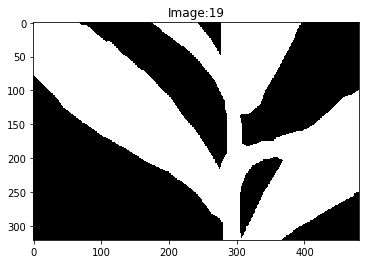

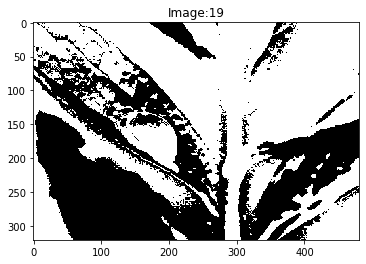

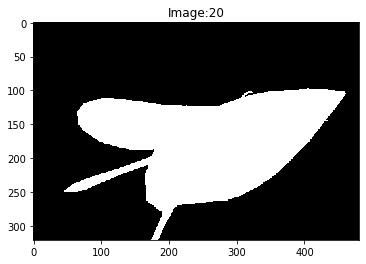

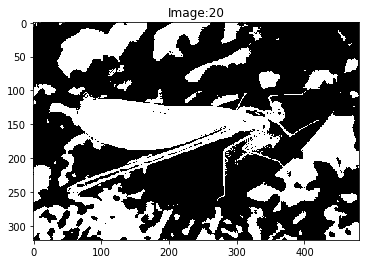

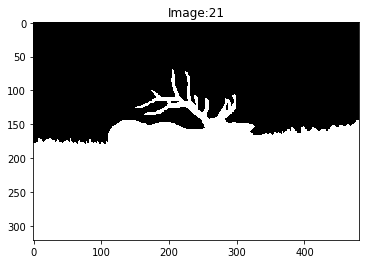

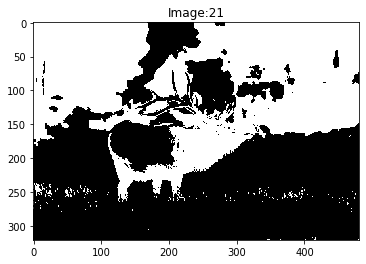

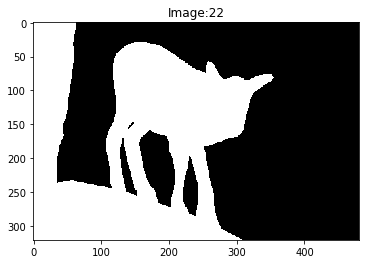

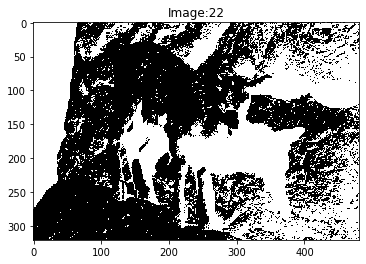

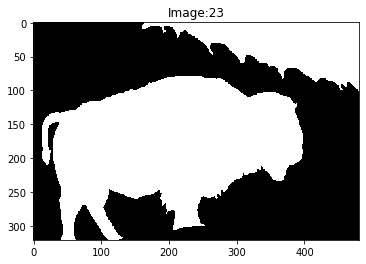

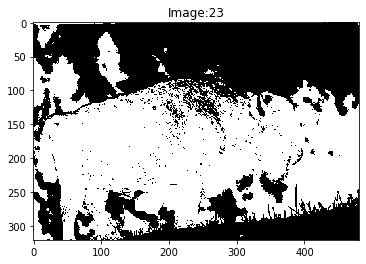

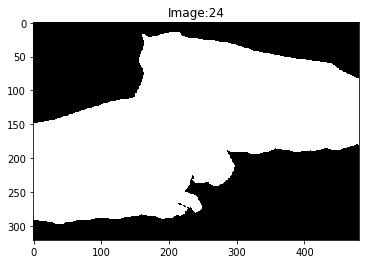

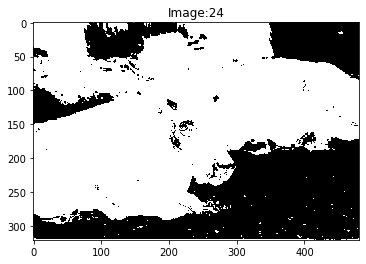

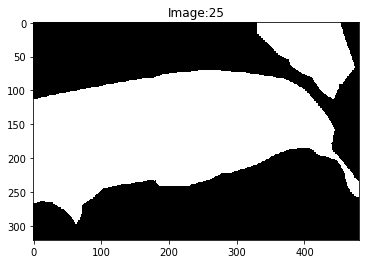

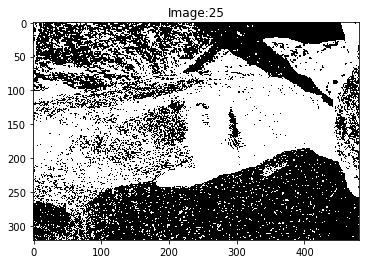

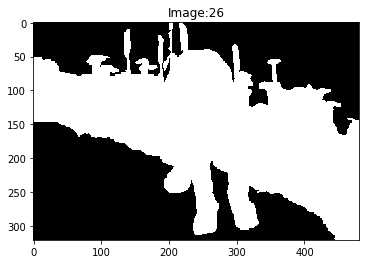

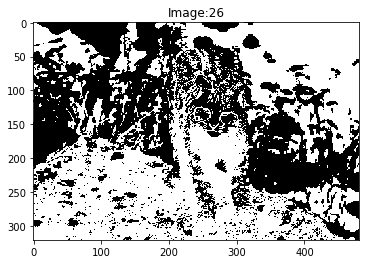

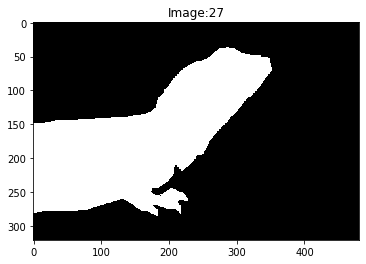

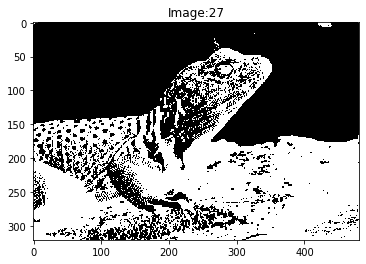

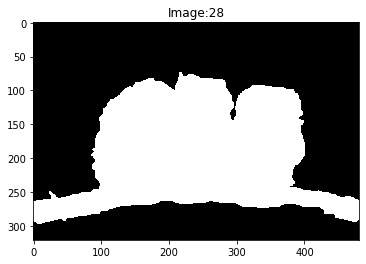

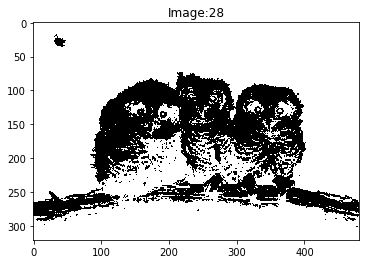

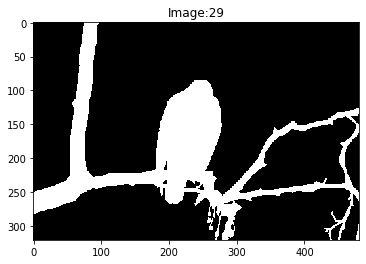

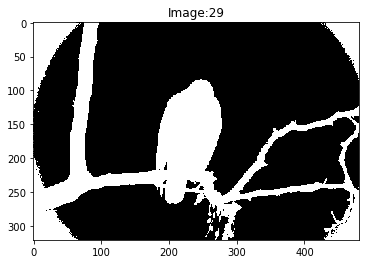

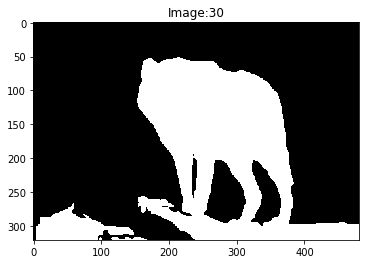

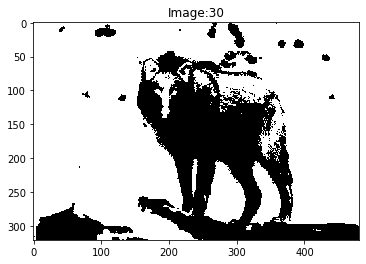

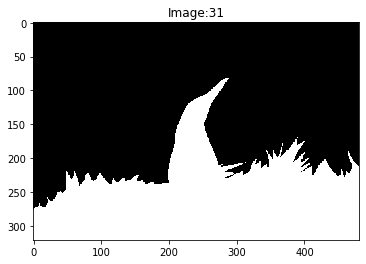

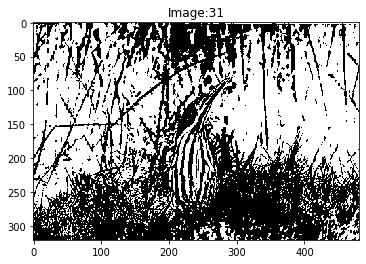

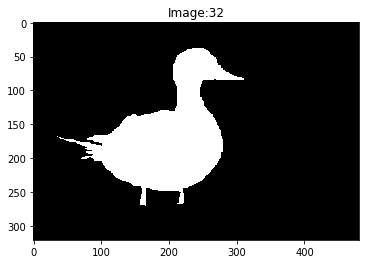

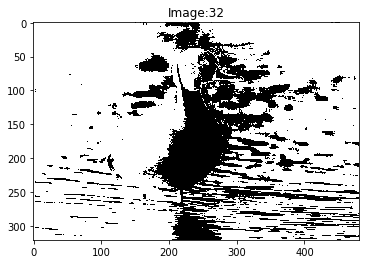

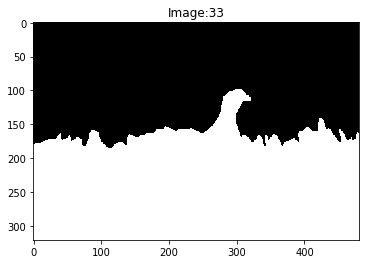

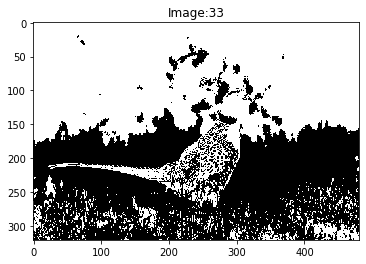

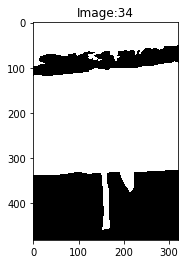

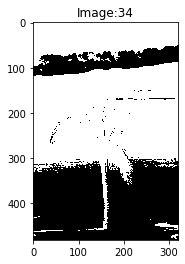

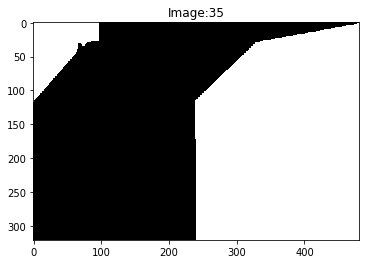

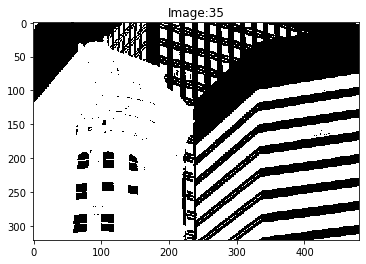

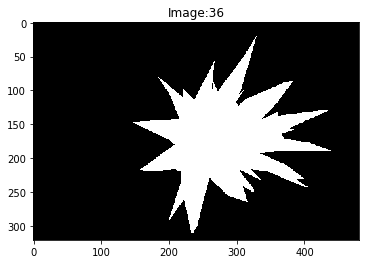

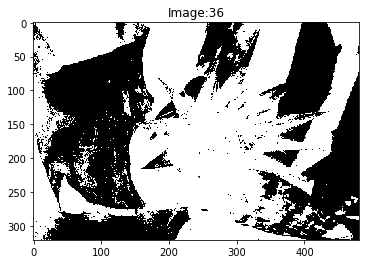

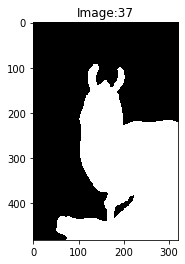

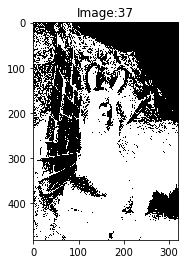

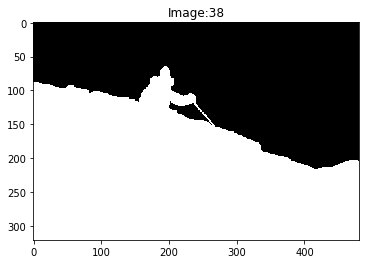

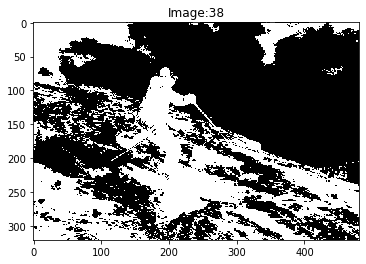

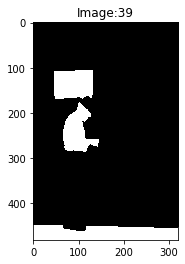

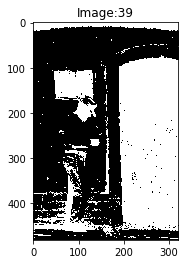

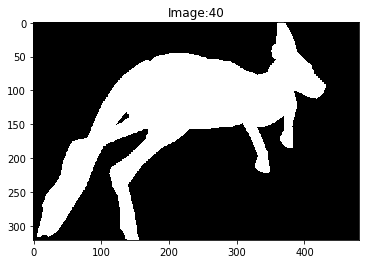

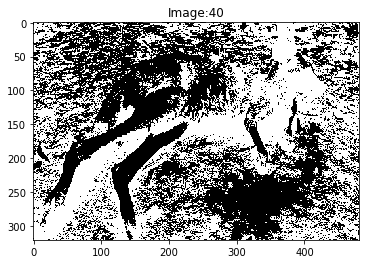

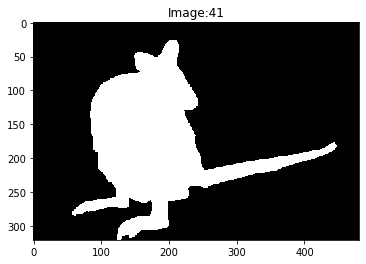

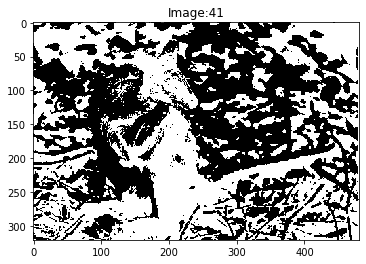

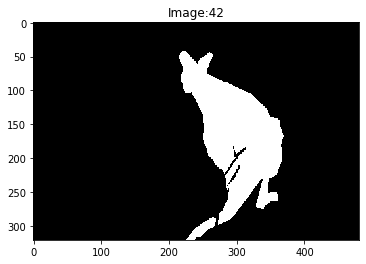

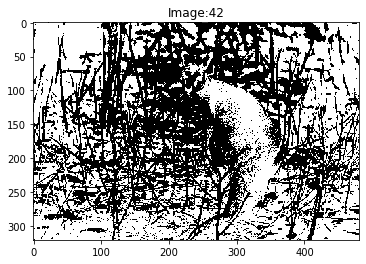

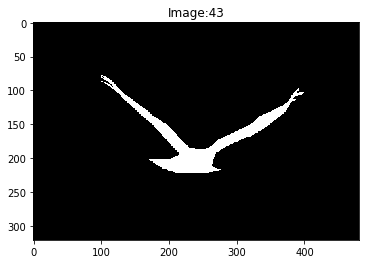

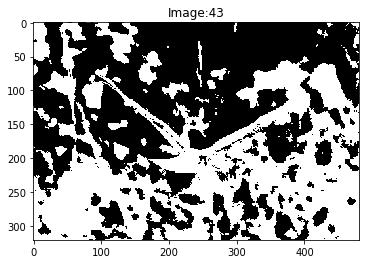

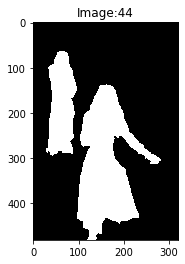

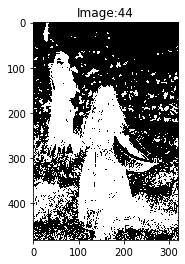

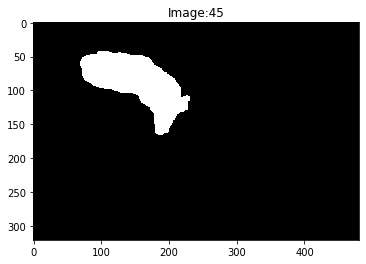

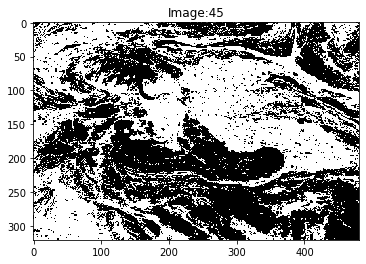

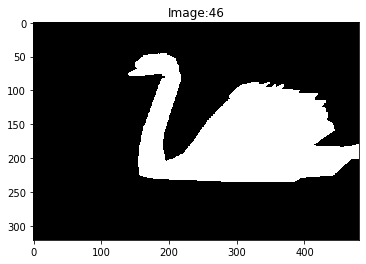

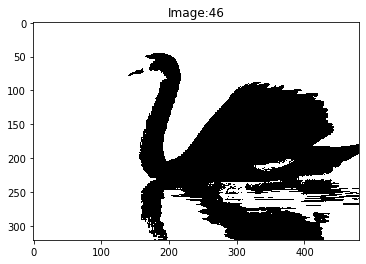

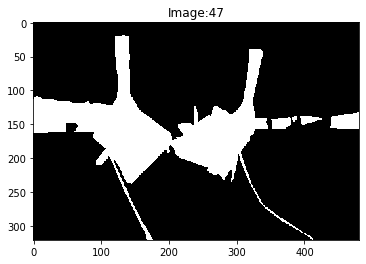

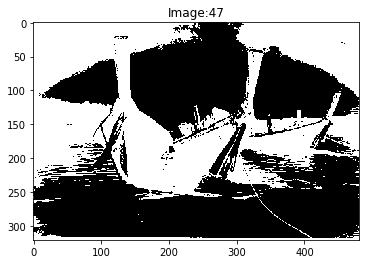

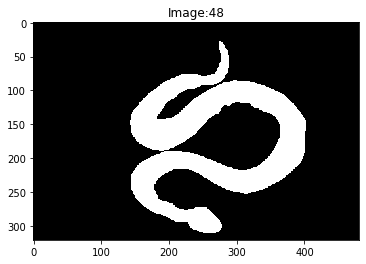

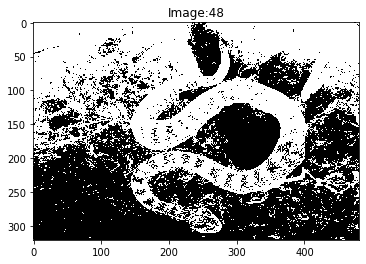

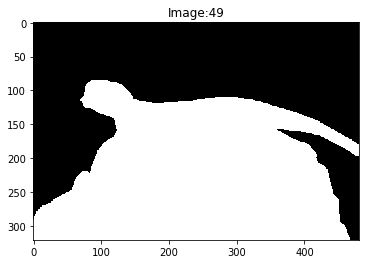

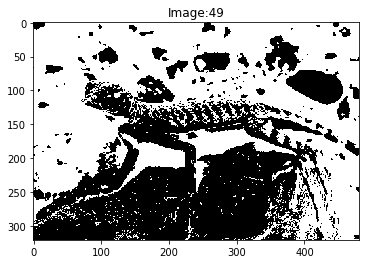

In [23]:
for i in range(50):
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(ground_truths[i], cmap = 'gray')
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(results[i], cmap = 'gray')
    

In [ ]:
ls = [0, 2, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49]
for i in ls:
    results[i] = convert(results[i])

In [14]:
precisions, recalls, accuracies, IOUs, F1_scores = calc_precision_recall(results, ground_truths)

for image 0 

for image 1 

for image 2 

for image 3 

for image 4 

for image 5 

for image 6 

for image 7 

for image 8 

for image 9 

for image 10 

for image 11 

for image 12 

for image 13 

for image 14 

for image 15 

for image 16 

for image 17 

for image 18 

for image 19 

for image 20 

for image 21 

for image 22 

for image 23 

for image 24 

for image 25 

for image 26 

for image 27 

for image 28 

for image 29 

for image 30 

for image 31 

for image 32 

for image 33 

for image 34 

for image 35 

for image 36 

for image 37 

for image 38 

for image 39 

for image 40 

for image 41 

for image 42 

for image 43 

for image 44 

for image 45 

for image 46 

for image 47 

for image 48 

for image 49 



In [15]:
df = pd.DataFrame(ID_data, columns = ['Image_ID'])
df.insert(1, "Precision", precisions, True) 
df.insert(2, "Recall", recalls, True)
df.insert(3, "F1_score", F1_scores, True) 
df.insert(4, "Accuracy", accuracies, True)
df.insert(5, "IOU", IOUs, True) 
df.head()

,Image_ID,Precision,Recall,F1_score,Accuracy,IOU
0,100098.jpg,0.963809,0.216656,0.353785,21.490793,0.214908
1,101027.jpg,0.247408,0.098399,0.140800,7.573137,0.075731
2,103006.jpg,0.536910,0.167318,0.255129,14.621667,0.146217
3,103029.jpg,0.586290,0.101000,0.172315,9.428048,0.094280
4,104010.jpg,0.478128,0.149248,0.227486,12.834114,0.128341


In [16]:
df.to_csv('Kmedoids_result.csv', index=False)

# Fuzzy C means